# 决策树
## 决策树建模训练

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import 
Classifier
import seaborn as sns

#引入数据集
df = pd.read_csv('https://blog.caiyongji.com/assets/iris.csv')

#决策树模型
X = df[['petal_length','petal_width']].to_numpy() 
y = df['species']
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 可视化决策树

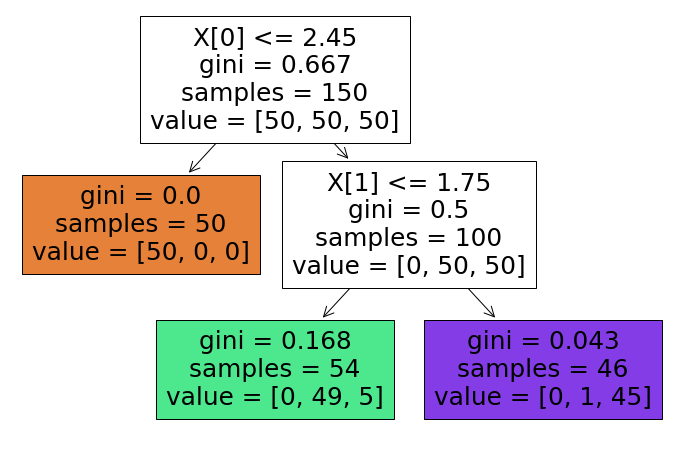

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf,filled=True);

# 随机森林
## 引入数据集

企鹅数据集包含特征和标签如下：
- 特征：所在岛屿island、鸟喙长度culmen_length_mm、鸟喙深度culmen_depth_mm、脚蹼长度flipper_length_mm、体重(g)、性别
- 标签：物种species：Chinstrap, Adélie, or Gentoo

In [3]:
df = pd.read_csv("https://blog.caiyongji.com/assets/penguins_size.csv")
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## 观察数据

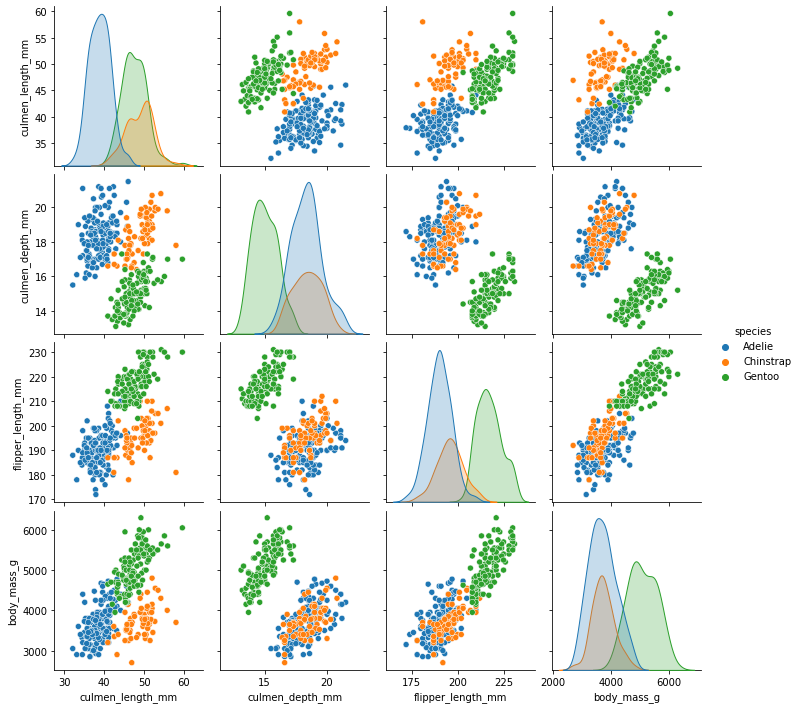

In [4]:
# 通过pairplot方法绘制特征两两之间的对应关系。
sns.pairplot(df,hue='species')

## 预处理

- get_dummies方法将字符串属性的列转换成了数字属性的多个列。如，岛屿island和性别sex分别转换成了island_Dream、island_Torgersen和sex_FEMALE、sex_MALE。这是一种独热编码的关系，比如sex_FEMALE与sex_MALE属性独立，在空间内没有向量关系。

In [5]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


## 训练数据
- 使用随机森林分类器RandomForestClassifier训练，得到模型精度为97%。

In [6]:
#训练
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)

#预测
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
accuracy_score(y_test,preds)

0.9702970297029703

## 网格搜索与AdaBoost提升法（拓展）

使用AdaBoostClassifier分类器集成数个决策树分类器DecisionTreeClassifier进行分类。并使用网格搜索方法GridSearchCV来寻找最优参数。

- 这是一种集成学习技术，输出结果如下

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=101)
ada_clf.fit(X_train, y_train)
param_grid = {'n_estimators':[10,15,20,25,30,35,40], 'learning_rate':[0.01,0.1,0.5,1], 'algorithm':['SAMME', 'SAMME.R']}
grid = GridSearchCV(ada_clf,param_grid)
grid.fit(X_train,y_train)
print("grid.best_params_ = ",grid.best_params_,", grid.best_score_ =" ,grid.best_score_)


grid.best_params_ =  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 20} , grid.best_score_ = 0.9914893617021276
